### Visualización

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df_combinado = pd.read_csv('ds_combinado.csv')

In [31]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126690 entries, 0 to 126689
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      126690 non-null  object 
 1   Corte_hoja                126690 non-null  float64
 2   Grado                     126690 non-null  object 
 3   Velocidad_pope            126690 non-null  float64
 4   Gramaje_cara              126690 non-null  float64
 5   Gramaje_Reverso           126690 non-null  float64
 6   Gramaje_Tripa             126690 non-null  float64
 7   Gramaje_prote             126690 non-null  float64
 8   Caudal_cara               126690 non-null  float64
 9   Caudal_Prote              126690 non-null  float64
 10  Caudal_Reverso            126690 non-null  float64
 11  Caudal_Tripa              126690 non-null  float64
 12  secado_1                  126690 non-null  float64
 13  secado_2                  126690 non-null  f

In [33]:
df_combinado['Date']

0         2024-05-01 00:00:00
1         2024-05-01 00:01:00
2         2024-05-01 00:02:00
3         2024-05-01 00:03:00
4         2024-05-01 00:04:00
                 ...         
126685    2024-07-31 23:56:00
126686    2024-07-31 23:57:00
126687    2024-07-31 23:58:00
126688    2024-07-31 23:59:00
126689    2024-08-01 00:00:00
Name: Date, Length: 126690, dtype: object

In [35]:
df_combinado['Date'] = pd.to_datetime(df_combinado['Date'], format='%Y-%m-%d %H:%M:%S')

In [37]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126690 entries, 0 to 126689
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      126690 non-null  datetime64[ns]
 1   Corte_hoja                126690 non-null  float64       
 2   Grado                     126690 non-null  object        
 3   Velocidad_pope            126690 non-null  float64       
 4   Gramaje_cara              126690 non-null  float64       
 5   Gramaje_Reverso           126690 non-null  float64       
 6   Gramaje_Tripa             126690 non-null  float64       
 7   Gramaje_prote             126690 non-null  float64       
 8   Caudal_cara               126690 non-null  float64       
 9   Caudal_Prote              126690 non-null  float64       
 10  Caudal_Reverso            126690 non-null  float64       
 11  Caudal_Tripa              126690 non-null  float64       
 12  se

### la variable 'Gramaje_pope' es el gramaje de la hoja de papel fabricado. Se mide en kg/m², y es una variable crítica que interesa controlar

visualización del gramaje dinal en el tiempo

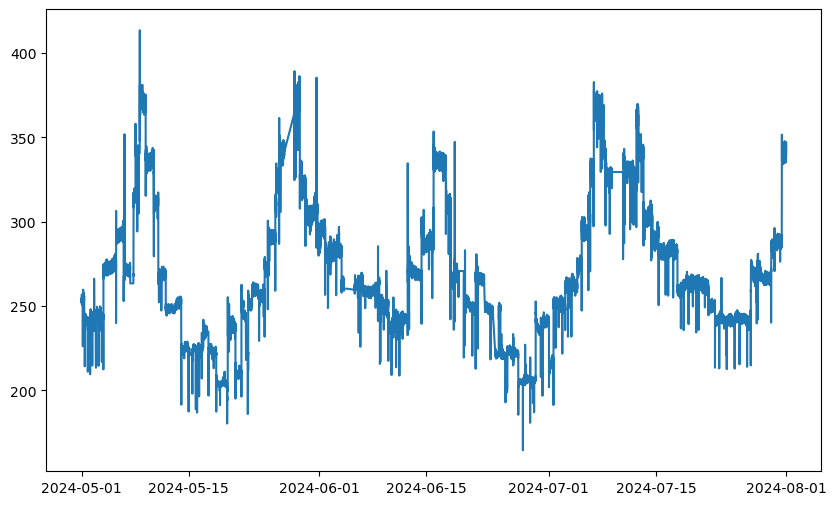

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(df_combinado['Date'], df_combinado['Gramaje_pope'])